# Real Estate Price Prediction with Aqar Dataset


In this notebook, we will:
1. Load and inspect the dataset
2. Preprocess data (handle missing values, encode categorical variables, scale features)
3. Train and evaluate regression models to predict property price
4. Train and evaluate classification models to predict if the property is for sale
5. Visualize model performance

### Import Libraries

In [1]:
%matplotlib inline

import plotly.io as pio
pio.renderers.default = "svg"


In [2]:
import sys
sys.path.append('../src')

In [3]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.figure_factory as ff
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from model import train_and_evaluate

In [4]:
import importlib
import metrics

importlib.reload(metrics)

from metrics import regression_metrics, classification_metrics

### Load Dataset

In [5]:
file_path = r"C:\Users\Rubah\OneDrive\سطح المكتب\MLmodels\data\aqar_fm_listings.csv"
data = pd.read_csv(file_path)

In [6]:
data

,id,title,url,price,meter_price,price_2_payments,price_4_payments,price_12_payments,rnpl_monthly_price,rent_period,...,rega_licensed,plan_no,parcel_no,user_type,user_verified,company_name,user_paid_tier,description,images,videos
0,6502998,دور للبيع في شارع شهيد الدين ثم الوطن فهد إبرا...,https://sa.aqar.fm/دور-للبيع/الرياض/شمال-الريا...,1500000.0,NaN,NaN,NaN,NaN,NaN,NaN,...,True,3783,407 + 408,0,True,NaN,5.0,مشروع ادوار سِـــدرا مشروع يتميز بموقعه الاستر...,"['039762754_1765464943659.jpg', '039762758_176...",['039762752_1765465117982']
1,6428644,"فيلا للبيع في شارع أحمد بن حيان, حي الملقا, مد...",https://sa.aqar.fm/فلل-للبيع/الرياض/شمال-الريا...,13500000.0,NaN,NaN,NaN,NaN,NaN,NaN,...,True,3776,177 / 2,1,True,شركة أثرى المتحدة العقارية,2.0,للبيع فيلا بتصميم مميز بملقا السلودير \n\n( ي...,"['002902001_1764757893800.jpg', '002902004_176...",[]
2,6516181,"دور للإيجار في شارع شداد بن أوس, حي العليا, مد...",https://sa.aqar.fm/دور-للإيجار/الرياض/شمال-الر...,105000.0,NaN,NaN,NaN,NaN,0.0,NaN,...,True,772,121,0,True,شركة السواعد العقارية,2.0,للإيجار فرصة سكنية مميزة\n\n🏡 نوع العقار: دور ...,"['043760574_1766388486688.jpg', '043760579_176...",['043760577_1766389086357']
3,6495984,"شقة للبيع في شارع الغائر, حي المروج, مدينة أبه...",https://sa.aqar.fm/شقق-للبيع/ابها/حي-درة-المنس...,635000.0,NaN,NaN,NaN,NaN,NaN,NaN,...,True,1022 / 1424هـ / ع / 1,499,0,True,مكتب خيال الأركان للعقار,4.0,🏠 شقق دوبلكس نظام تاون هاوس🏠\nللبيع شقق دوبلكس...,"['000635467_1765094224978.jpg', '000635463_176...",['000635463_1765094375794']
4,6513148,"شقة للبيع في شارع السالمية, حي البحيرة, مدينة ...",https://sa.aqar.fm/شقق-للبيع/ابها/حي-ابها-الجد...,510000.0,NaN,NaN,NaN,NaN,NaN,NaN,...,True,152 / أ / 1,17,0,True,مكتب خيال الأركان للعقار,4.0,🌟للبيع شقق تمليك في ارقى احياء ابها حي الاطلال...,"['000635468_1766167214019.jpg', '000635462_176...",['000635460_1766167341766']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6255,6511657,"شقة للإيجار في شارع علقمة بن وائل, حي النرجس, ...",https://sa.aqar.fm/شقق-للإيجار/الرياض/شمال-الر...,80000.0,NaN,NaN,NaN,NaN,0.0,NaN,...,True,2737,3863,0,True,شركة مستويات العقارية,2.0,مشروع سيل 35 حي النرجس ( شمال سلمان) \nالمشروع...,"['005417420_1766051816215.jpg', '005417420_176...",['005417426_1766051881089']
6256,6479026,"شقة للبيع في شارع القبة, حي إشبيلية, مدينة الر...",https://sa.aqar.fm/شقق-للبيع/الرياض/شرق-الرياض...,750000.0,NaN,NaN,NaN,NaN,NaN,NaN,...,True,2958/أ,88 + 90 + 92,1,True,شركة الإنشاء المتكامل للاستثمار,2.0,شقة للبيع - دور أرضي \nعمر الشقة (18سنة)\nالمو...,"['002508177_1763983175791.jpg', '002508176_176...",['002508176_1763983307296']
6257,6427826,"فيلا للبيع في شارع جبل نمرة, حي قرطبة, مدينة ا...",https://sa.aqar.fm/فلل-للبيع/الرياض/شرق-الرياض...,2700000.0,NaN,NaN,NaN,NaN,NaN,NaN,...,True,2231 / ب,134 / 1,1,True,شركة الإنشاء المتكامل للاستثمار,2.0,للبيع فيلا نظام ادوار\n\nدور + دور + شقة\n\nفي...,"['002508170_1760693045311.jpg', '002508176_176...",['002508177_1760693103724']
6258,6444496,"شقة للبيع في شارع سالم بن عمير الاوسي, حي العا...",https://sa.aqar.fm/شقق-للبيع/الرياض/شمال-الريا...,1150000.0,NaN,NaN,NaN,NaN,NaN,NaN,...,True,2078 / أ ب,1865 / أ,0,NaN,NaN,2.0,للبيع شقة حى العارض المساحة 148م التفاصيل 3 غر...,['048647517_1761673158040.jpg'],['048647512_1761673221930']


### Quick Dataset Overview
We check column types, non-null counts, and numeric statistics to understand the dataset. Missing values are also important for preprocessing.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6260 entries, 0 to 6259
Data columns (total 79 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       6260 non-null   int64  
 1   title                    6251 non-null   object 
 2   url                      6260 non-null   object 
 3   price                    6260 non-null   float64
 4   meter_price              431 non-null    float64
 5   price_2_payments         617 non-null    float64
 6   price_4_payments         596 non-null    float64
 7   price_12_payments        598 non-null    float64
 8   rnpl_monthly_price       950 non-null    float64
 9   rent_period              835 non-null    float64
 10  area_sqm                 6260 non-null   int64  
 11  deed_area                6249 non-null   float64
 12  num_bedrooms             5487 non-null   float64
 13  num_bathrooms            3523 non-null   float64
 14  num_living_rooms        

In [8]:
data.describe()


,id,price,meter_price,price_2_payments,price_4_payments,price_12_payments,rnpl_monthly_price,rent_period,area_sqm,deed_area,...,published_at,last_update,verified,boosted,premium,has_img,has_video,ad_license_number,user_type,user_paid_tier
count,6.260000e+03,6.260000e+03,431.000000,617.000000,596.000000,598.000000,9.500000e+02,835.000000,6.260000e+03,6249.000000,...,6.260000e+03,6.260000e+03,6260.000000,6260.000000,6260.000000,6260.0,6260.000000,6.250000e+03,6260.000000,6068.000000
mean,6.443584e+06,1.080462e+06,2175.690557,16633.387358,4694.127517,4443.946488,7.628265e+06,2.868263,1.135608e+03,1035.925661,...,1.761887e+09,1.766943e+09,0.997604,0.027636,0.000479,1.0,0.949521,7.196583e+09,0.206709,2.093935
std,7.109728e+04,3.267496e+06,7112.493061,36445.059439,19959.835698,20372.317223,7.717654e+07,0.338407,1.999213e+04,13777.533207,...,4.281328e+06,2.028374e+05,0.048896,0.163940,0.021888,0.0,0.218949,1.999773e+07,0.404977,0.712559
min,6.021534e+06,3.700000e+01,1.000000,0.000000,0.000000,0.000000,0.000000e+00,2.000000,1.000000e+00,0.000000,...,1.739142e+09,1.762460e+09,0.000000,0.000000,0.000000,1.0,0.000000,7.100142e+09,0.000000,0.000000
25%,6.395056e+06,2.990000e+05,400.000000,0.000000,0.000000,0.000000,0.000000e+00,3.000000,1.300000e+02,144.340000,...,1.758711e+09,1.766984e+09,1.000000,0.000000,0.000000,1.0,1.000000,7.200670e+09,0.000000,2.000000
50%,6.465124e+06,6.800000e+05,800.000000,0.000000,0.000000,0.000000,3.121000e+03,3.000000,1.980000e+02,233.970000,...,1.763052e+09,1.766998e+09,1.000000,0.000000,0.000000,1.0,1.000000,7.200749e+09,0.000000,2.000000
75%,6.502997e+06,1.130000e+06,2000.000000,0.000000,0.000000,0.000000,5.796000e+03,3.000000,3.480000e+02,450.000000,...,1.765505e+09,1.767005e+09,1.000000,0.000000,0.000000,1.0,1.000000,7.200791e+09,0.000000,2.000000
max,6.525619e+06,1.820914e+08,100000.000000,265000.000000,220000.000000,240000.000000,1.545860e+09,3.000000,1.146600e+06,576433.000000,...,1.767012e+09,1.767013e+09,1.000000,1.000000,1.000000,1.0,1.000000,7.200816e+09,1.000000,5.000000


In [9]:
data.isnull().sum()

id                   0
title                9
url                  0
price                0
meter_price       5829
                  ... 
company_name       318
user_paid_tier     192
description         34
images               0
videos               0
Length: 79, dtype: int64

###  Feature Selection & Preprocessing

Drop columns not useful for modeling

In [10]:
drop_cols = ['id','url','images','videos','description','title','deed_number']
data = data.drop(columns=drop_cols)

In [11]:
numeric_cols = ['area_sqm', 'num_bedrooms', 'num_rooms', 'latitude', 'longitude', 'user_paid_tier']


In [12]:
categorical_cols = ['furnished', 'duplex', 'ac', 'pool', 'city']


In [13]:
for col in numeric_cols:
    data[col] = data[col].fillna(data[col].median())

In [14]:
for col in categorical_cols:
    data[col] = data[col].fillna('Unknown')

In [15]:
data_encoded = pd.get_dummies(data[numeric_cols + categorical_cols], drop_first=True)


In [16]:
y = data['price']

In [17]:
y_log = np.log1p(y)

In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_encoded)

In [19]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
    "SVR": SVR()
}



Training Linear Regression...


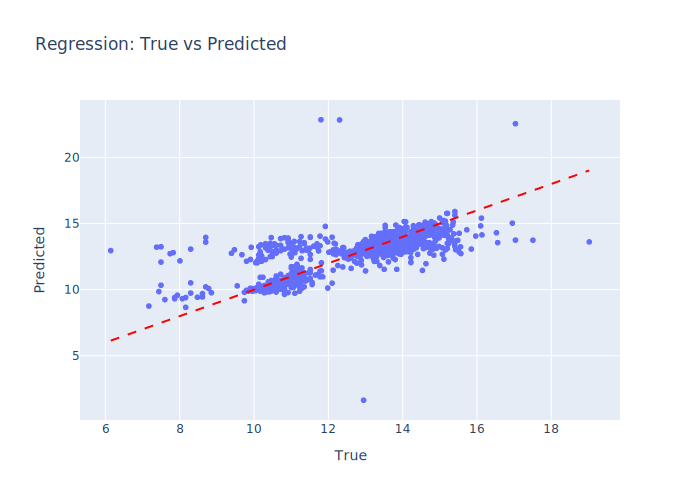


Training Random Forest Regressor...


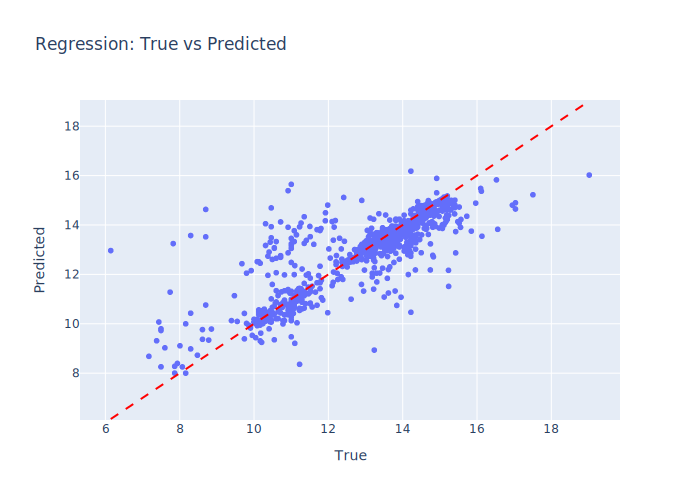


Training SVR...


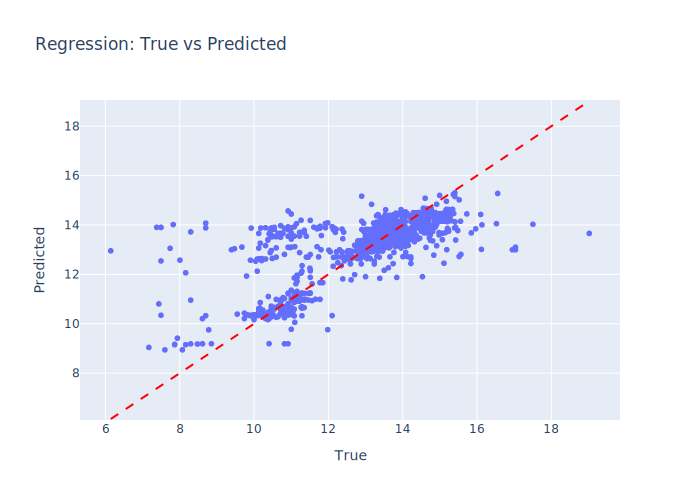

In [20]:
metrics_results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    
    metrics = train_and_evaluate(
        model,
        X_scaled,
        y_log,        
        task="regression",
        plot=True
    )
    
    metrics_results[name] = metrics

In [21]:
metrics = pd.DataFrame(metrics_results)

In [22]:
metrics

,Linear Regression,Random Forest Regressor,SVR
MSE,1.411909,0.766283,1.210803
RMSE,1.188238,0.875376,1.100365


In [24]:
import os
from joblib import dump

os.makedirs("models", exist_ok=True)

best_model_name = 'Random Forest Regressor'
best_model = models[best_model_name]
best_model_name = 'Random Forest Regressor_aqar'
model_path = f"models/{best_model_name.replace(' ', '_')}.joblib"
dump(best_model, model_path)

print(f"Saved {best_model_name} as '{model_path}'")

Saved Random Forest Regressor_aqar as 'models/Random_Forest_Regressor_aqar.joblib'
